[0.03159499 0.98698776] 0
[-0.38289117 -0.09084004] 1
[-0.17749658  0.93049627] 1


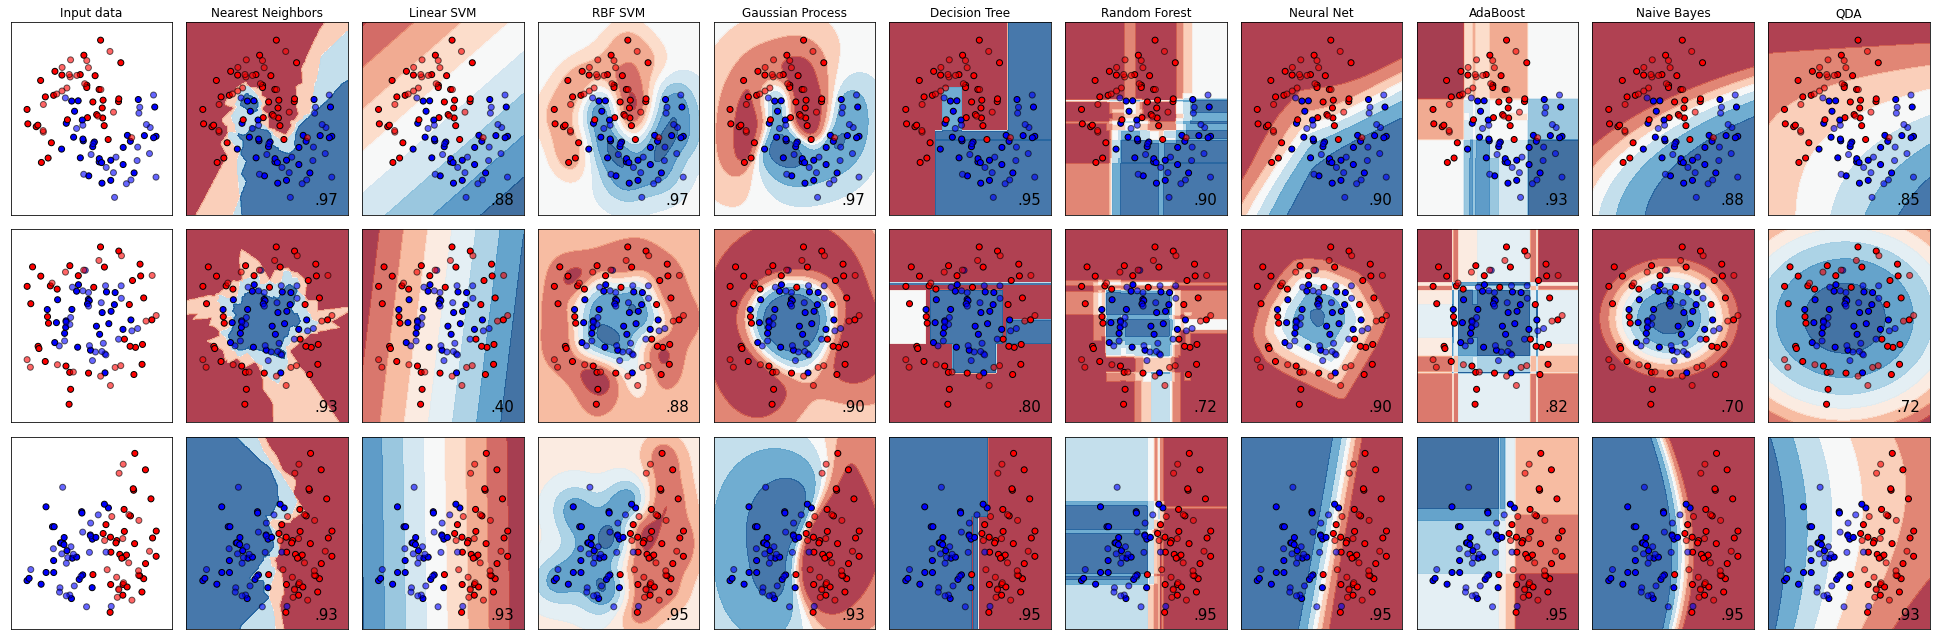

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    print(X[0], y[0])
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

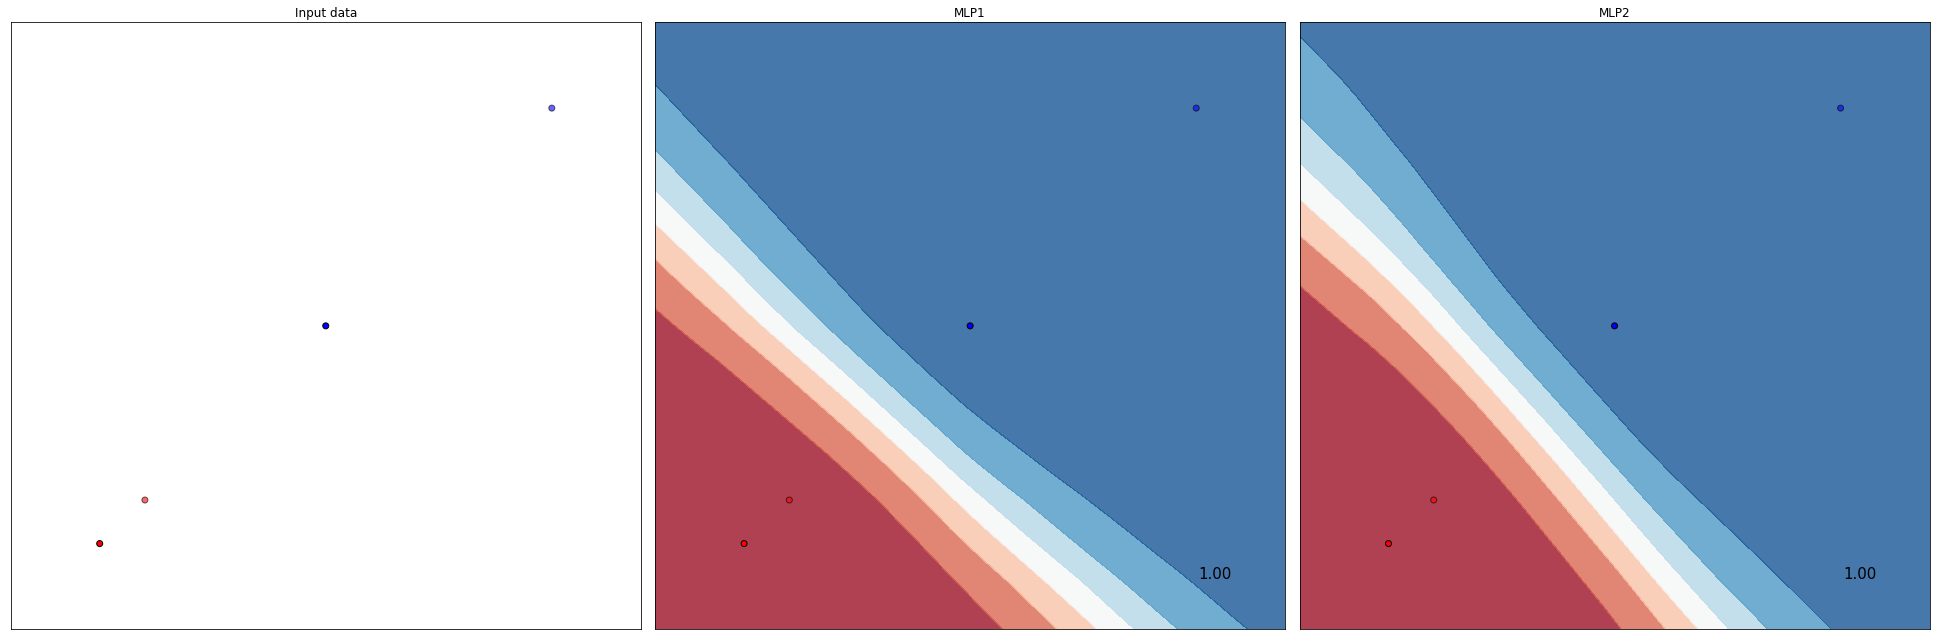

In [2]:
names = ["MLP1", "MLP2"]

classifiers = [
    MLPClassifier(max_iter=1000),
    MLPClassifier(max_iter=10000)]

figure = plt.figure(figsize=(27, 9))
i = 1

datasets = [(np.array([[0,0],[1,1],[0.5,0.5],[0.1,0.1]]), np.array([0,1,1,0]))]

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

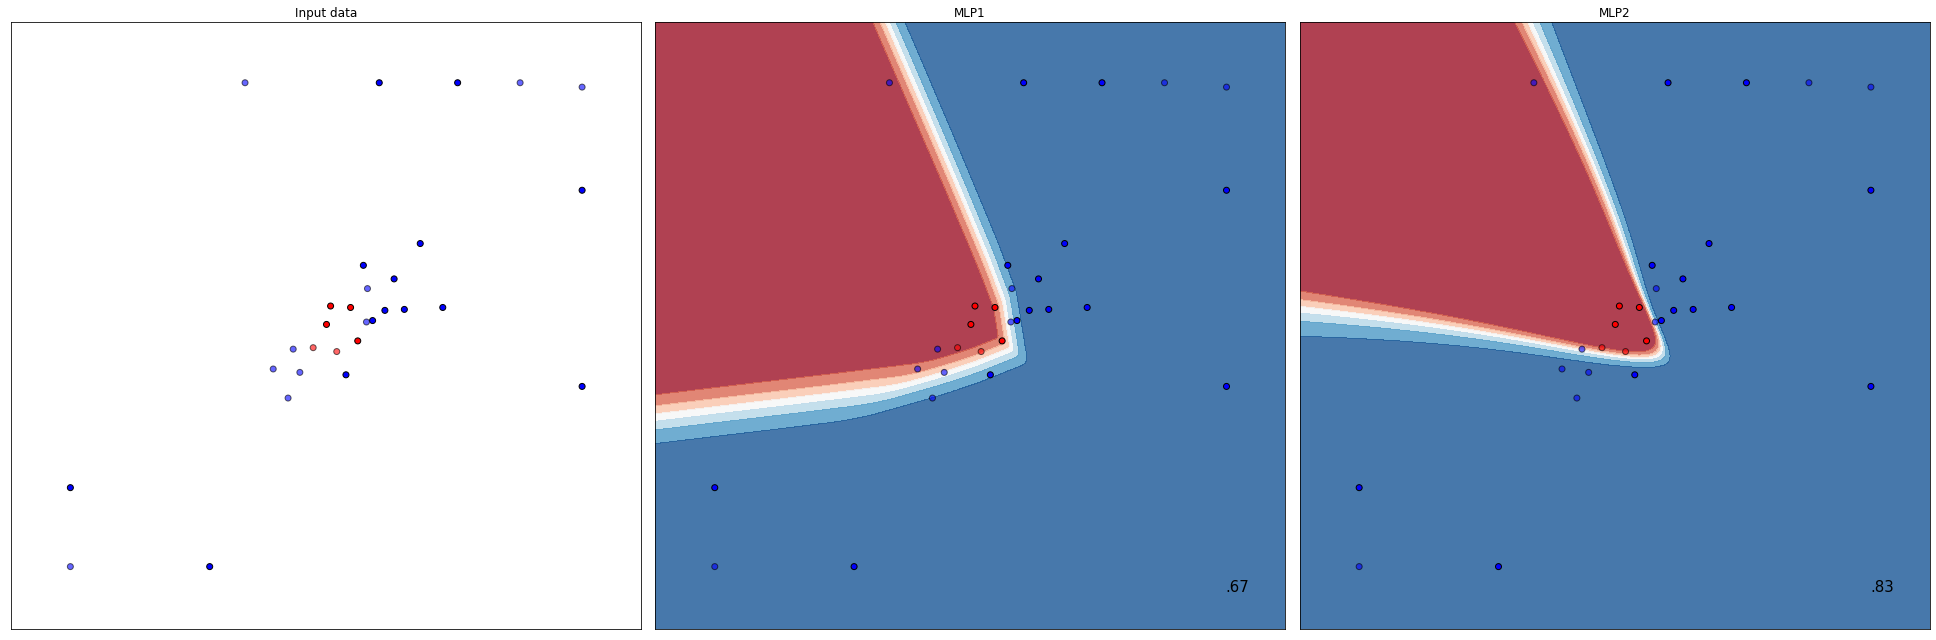

In [3]:
names = ["MLP1", "MLP2"]

classifiers = [
    MLPClassifier(max_iter=100000),
    MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]

figure = plt.figure(figsize=(27, 9))
i = 1

#datasets = [(np.array([[0,0],[1,1],[0.5,0.5],[0.1,0.1]]), np.array([0,1,1,0]))]
ex_name = '1_mlp_plt_gen_4.txt'
folder_name = 'ml_threads/'
f_name = folder_name + ex_name
with open(f_name, 'r') as f:
    threads = f.readlines()

x_train, y_train = [], []
for t in threads:
    tr = list(map(float, t.replace('\n', '').split(',')))
    x_train.append(tr[:-1])
    y_train.append(tr[-1])
datasets = [(np.array(x_train), np.array(y_train))]


# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


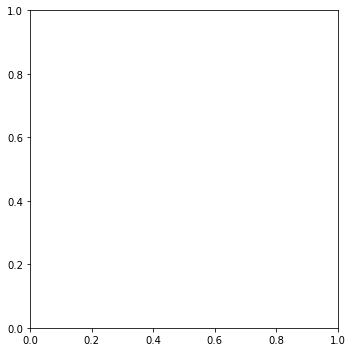

In [4]:
import matplotlib.animation as animation

names = ["Circle 3"]

classifiers = [
    MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]
#MLPClassifier(max_iter=100000, random_state=42)]
#MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]

fig, ax = plt.subplots(figsize=(5, 5))
fig.set_tight_layout(True)


#datasets = [(np.array([[0,0],[1,1],[0.5,0.5],[0.1,0.1]]), np.array([0,1,1,0]))]
ex_name = '1_mlp_plt_gen_3_3.txt'
#1_mlp_plt_gen.txt Line line_{}.png 40
#1_mlp_plt_gen_2.txt Arc arc_{}.png 30
#1_mlp_plt_gen_3.txt Circle circle_{}.png 100
#1_mlp_plt_gen_3_2.txt Circle 2 circle_2_{}.png 100
#1_mlp_plt_gen_3_3.txt Circle 3 circle_3_{}.png 100
folder_name = 'ml_threads/'
f_name = folder_name + ex_name
with open(f_name, 'r') as f:
    threads = f.readlines()

x_train, y_train = [], []
for t in threads:
    tr = list(map(float, t.replace('\n', '').split(',')))
    x_train.append(tr[:-1])
    y_train.append(tr[-1])
datasets = [(np.array(x_train), np.array(y_train))]

def animate(frame):
    print(frame)
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X, y = X[:frame+2], y[:frame+2]
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))



        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            #ax.clear()
            #ax = fig.add_subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X, y)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            #ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
            #return ax
            filename = 'img/circle_3_{}.png'.format(frame)
            plt.savefig(filename)
            ax.clear()

#plt.tight_layout()
#plt.show()

#ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, 10), interval=200)


#plt.show()
#ani.save('1.gif', writer='imagemagick', fps=30)
for i in range(100):
    animate(i)

In [5]:
import imageio
with imageio.get_writer('img/3_3.gif', mode='I') as writer:
    for i in range(100):
        filename = 'img/circle_3_{}.png'.format(i)
        image = imageio.imread(filename)
        writer.append_data(image)

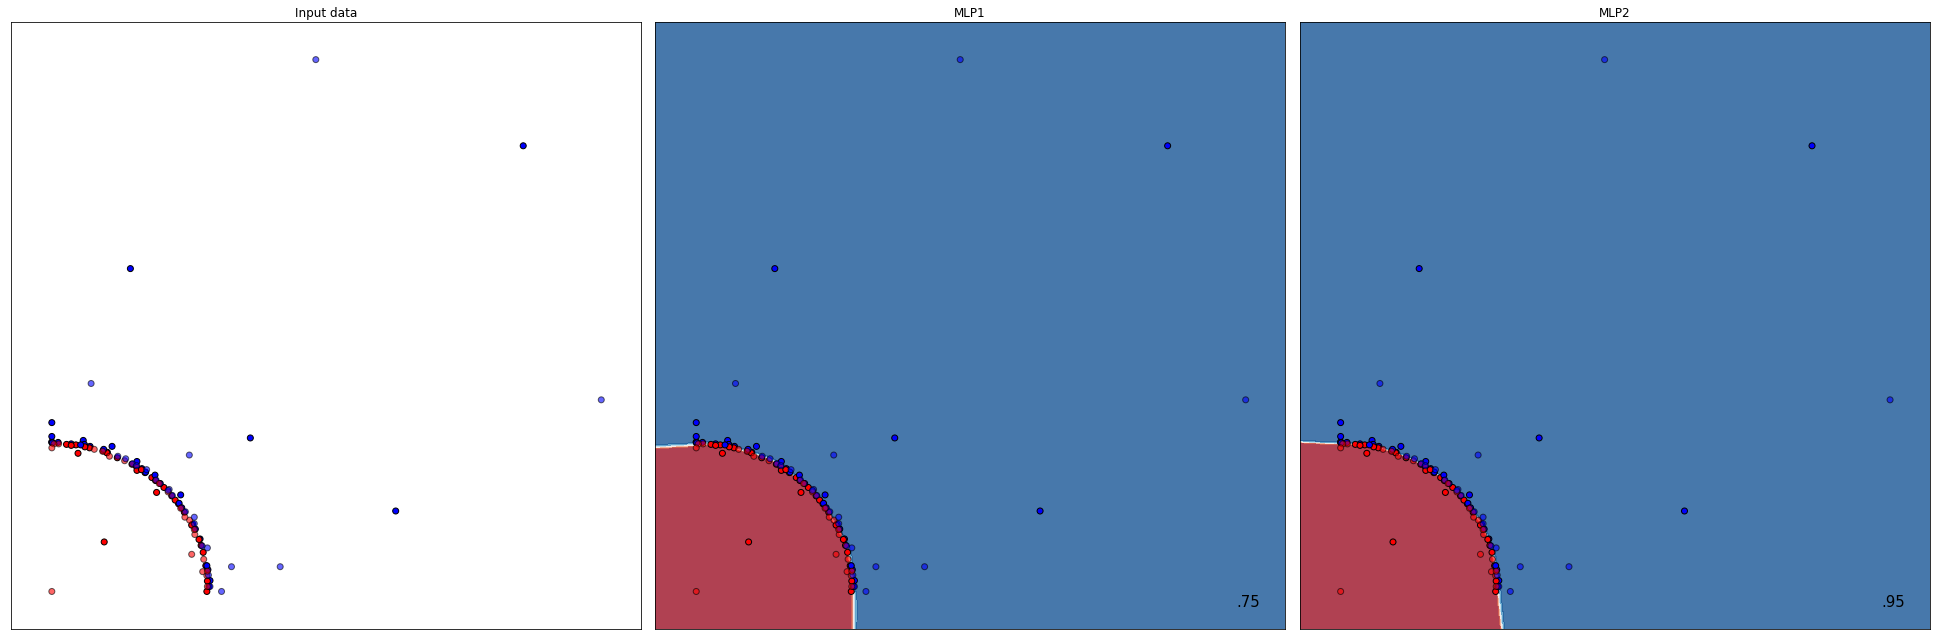

In [6]:
names = ["MLP1", "MLP2"]

classifiers = [
    MLPClassifier(max_iter=100000),
    MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]

figure = plt.figure(figsize=(27, 9))
i = 1

#datasets = [(np.array([[0,0],[1,1],[0.5,0.5],[0.1,0.1]]), np.array([0,1,1,0]))]
ex_name = '1_mlp_plt_gen_2.txt'
folder_name = 'ml_threads/'
f_name = folder_name + ex_name
with open(f_name, 'r') as f:
    threads = f.readlines()

x_train, y_train = [], []
for t in threads:
    tr = list(map(float, t.replace('\n', '').split(',')))
    x_train.append(tr[:-1])
    y_train.append(tr[-1])
datasets = [(np.array(x_train), np.array(y_train))]


# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [7]:
data = '''351.txt
0
303.txt
0
257.txt
0
280.txt
0
234.txt
0
187.txt
0
140.txt
0
21.txt
0
69.txt
0
92.txt
0
790.txt
1
924.txt
1
709.txt
1
327.txt
0
702.txt
0
869.txt
1
550.txt
0
539.txt
0
506.txt
0
560.txt
0
825.txt
0
594.txt
0
777.txt
0
674.txt
0
24.txt
0
542.txt
0
521.txt
0
902.txt
1
607.txt
0
755.txt
1
661.txt
1
746.txt
1
588.txt
0
681.txt
1
799.txt
1
524.txt
0
666.txt
1
692.txt
1
1075.txt
1
696.txt
1
635.txt
1
672.txt
641.txt
1
611.txt
629.txt
0
615.txt
1000.txt
0
724.txt
1
704.txt
925.txt
0
827.txt
1
655.txt
1
643.txt
0
876.txt
1
901.txt
1
'''

N1 = 25
N2 = 201
#strike_energy = np.linspace(0, 50, N2, endpoint=True)
strike_energy = np.linspace(0, 1, N2, endpoint=True)
strike_energy = list(map(lambda x: round(x, 5), strike_energy))

#protection_thickness = np.linspace(2.0, 8.0, N1, endpoint=True)
protection_thickness = np.linspace(0, 1, N1, endpoint=True)
protection_thickness = list(map(lambda x: round(x, 5), protection_thickness))

X = {}
i = 0
for s in strike_energy:
    for p in protection_thickness:
        X[i] = [s, p]
        i += 1

x_train_2, y_train_2 = [], []
extra_grid = {}
        
ls = data.split()
print(ls)
for i in range(len(ls)-1):
    if 'txt' in ls[i]:
        if ls[i+1] in '01':
            t_id = int(ls[i].replace('.txt', ''))
            print(t_id, ls[i+1], X[t_id])
            x_train_2.append(X[t_id])
            y_train_2.append(int(ls[i+1]))
            extra_grid[t_id] = int(ls[i+1])
print(len(y_train_2))
print(extra_grid)

['351.txt', '0', '303.txt', '0', '257.txt', '0', '280.txt', '0', '234.txt', '0', '187.txt', '0', '140.txt', '0', '21.txt', '0', '69.txt', '0', '92.txt', '0', '790.txt', '1', '924.txt', '1', '709.txt', '1', '327.txt', '0', '702.txt', '0', '869.txt', '1', '550.txt', '0', '539.txt', '0', '506.txt', '0', '560.txt', '0', '825.txt', '0', '594.txt', '0', '777.txt', '0', '674.txt', '0', '24.txt', '0', '542.txt', '0', '521.txt', '0', '902.txt', '1', '607.txt', '0', '755.txt', '1', '661.txt', '1', '746.txt', '1', '588.txt', '0', '681.txt', '1', '799.txt', '1', '524.txt', '0', '666.txt', '1', '692.txt', '1', '1075.txt', '1', '696.txt', '1', '635.txt', '1', '672.txt', '641.txt', '1', '611.txt', '629.txt', '0', '615.txt', '1000.txt', '0', '724.txt', '1', '704.txt', '925.txt', '0', '827.txt', '1', '655.txt', '1', '643.txt', '0', '876.txt', '1', '901.txt', '1']
351 0 [0.07, 0.04167]
303 0 [0.06, 0.125]
257 0 [0.05, 0.29167]
280 0 [0.055, 0.20833]
234 0 [0.045, 0.375]
187 0 [0.035, 0.5]
140 0 [0.025, 

25


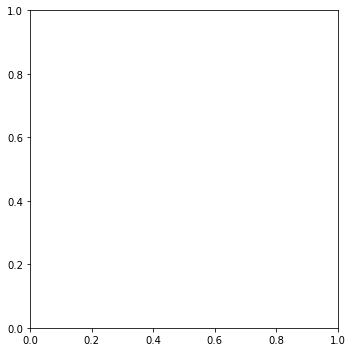

In [8]:
import matplotlib.animation as animation

names = ['Points: 50']#["Gcm Cubic"]

classifiers = [
    MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]
#MLPClassifier(max_iter=100000, random_state=42)]
#MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]

fig, ax = plt.subplots(figsize=(5, 5))
fig.set_tight_layout(True)


base_ids = {0: 0, 6: 0, 12: 0, 18: 0, 24: 1, 1250: 1, 1256: 1, 1262: 1, 1268: 1, 1274: 1, 2500: 1, 2506: 1, 2512: 1, 2518: 1, 2524: 1, 3750: 1, 3756: 1, 3762: 1, 3768: 1, 3774: 1, 5000: 1, 5006: 1, 5012: 1, 5018: 1, 5024: 1}
N1 = 25
N2 = 201
#strike_energy = np.linspace(0, 50, N2, endpoint=True)
strike_energy = np.linspace(0, 1, N2, endpoint=True)
strike_energy = list(map(lambda x: round(x, 5), strike_energy))

#protection_thickness = np.linspace(2.0, 8.0, N1, endpoint=True)
protection_thickness = np.linspace(0, 1, N1, endpoint=True)
protection_thickness = list(map(lambda x: round(x, 5), protection_thickness))

x_train, y_train = [], []
i = 0
for s in strike_energy:
    for p in protection_thickness:
        if i in base_ids:
            x_train.append([s, p])
            y_train.append(base_ids[i])
        i += 1

x_train, y_train = x_train + x_train_2, y_train + y_train_2
        
datasets = [(np.array(x_train), np.array(y_train))]

def recalc_ticks(xx):
    step = 0.4#1.4
    xmax, xmin = xx.max(), xx.min()
    x_all = xmax - xmin
    xt_all = step + step
    xt_pr = 1 - (xt_all / x_all)
    xt_cut = xt_pr * x_all / 2
    return np.linspace(xmin+xt_cut, xmax-xt_cut, 5, endpoint=True)


def animate(frame):
    print(frame)
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X, y = X[:frame+25], y[:frame+25]
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))



        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            #ax.clear()
            #ax = fig.add_subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X, y)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            #ax.set_xticks(())
            #ax.set_yticks(())
            
            ###
            ax.set_xlabel('Strike energy')
            ax.set_ylabel('Protection thickness')
            ax.set_xticks(np.linspace(X[:, 0].min(), X[:, 0].max(), 5, endpoint=True))
            ax.set_yticks(np.linspace(X[:, 1].min(), X[:, 1].max(), 5, endpoint=True))
            ax.set_xticklabels(np.linspace(0, 50, 5, endpoint=True))
            ax.set_yticklabels(np.linspace(2, 8, 5, endpoint=True))
            ###
            
            if ds_cnt == 0:
                ax.set_title(name)
            #ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
            #return ax
            filename = 'img/gcm_1_{}.png'.format(frame)
            plt.savefig(filename)
            ax.clear()

#plt.tight_layout()
#plt.show()

#ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, 10), interval=200)
    

#plt.show()
#ani.save('1.gif', writer='imagemagick', fps=30)
for i in range(52):#52
    animate(25)
    break

In [9]:
import imageio
with imageio.get_writer('img/gcm_1.gif', mode='I') as writer:
    for i in range(52):
        filename = 'img/gcm_1_{}.png'.format(i)
        image = imageio.imread(filename)
        writer.append_data(image)

In [10]:
data = '''68.txt
1
64.txt
1
84.txt
1
80.txt
1
70.txt
1
86.txt
1
66.txt
1
82.txt
1
69.txt
1
85.txt
1
65.txt
1
81.txt
1
83.txt
1
67.txt
1
87.txt
1
71.txt
1
88.txt
1
72.txt
1
94.txt
1
76.txt
1
93.txt
1
96.txt
1
112.txt
1
116.txt
1
92.txt
1
100.txt
1
78.txt
1
90.txt
1
74.txt
1
89.txt
1
77.txt
1
73.txt
1
95.txt
1
98.txt
1
114.txt
1
118.txt
1
102.txt
1
79.txt
1
75.txt
1
91.txt
1
97.txt
1
113.txt
1
117.txt
1
101.txt
1
8.txt
0
12.txt
0
0.txt
0
4.txt
0
124.txt
1
120.txt
1
99.txt
1
115.txt
1
119.txt
1
103.txt
1
32.txt
0
36.txt
0
44.txt
0
40.txt
0
2.txt
0
6.txt
0
10.txt
0
14.txt
0
104.txt
0
108.txt
0
1.txt
0
9.txt
0
13.txt
0
5.txt
0
42.txt
0
46.txt
0
38.txt
0
34.txt
0
110.txt
0
106.txt
0
41.txt
0
37.txt
0
33.txt
0
45.txt
0
109.txt
0
3.txt
0
105.txt
0
7.txt
0
11.txt
0
15.txt
0
43.txt
0
39.txt
0
35.txt
0
111.txt
0
47.txt
0
16.txt
0
20.txt
0
107.txt
0
28.txt
0
24.txt
0
121.txt
1
125.txt
1
52.txt
0
48.txt
0
60.txt
0
56.txt
0
18.txt
0
30.txt
0
22.txt
0
26.txt
0
17.txt
0
29.txt
0
21.txt
0
25.txt
0
50.txt
0
54.txt
0
58.txt
0
126.txt
0
122.txt
0
19.txt
0
49.txt
0
57.txt
0
53.txt
0
31.txt
0
23.txt
0
27.txt
0
'''

N = 2

rangee = lambda start, stop, N: tuple(map(lambda x: round(x, 5), np.linspace(start, stop, N, endpoint=True)))

strike_energy = rangee(0, 50, N)
protection_thickness = rangee(1.0, 8.0, N)
strike_duration = rangee(0.5e-4, 2.5e-4, N)
material_strength_limit = rangee(1e7, 7e7, N)
contact_strength_limit = rangee(1e7, 7e7, N)
target_thickness = rangee(8.0, 16.0, N)
width = rangee(8.0, 16.0, N)


X2 = {}
XY = {}
i = 0
for se in strike_energy:
  for p in protection_thickness:
    for sd in strike_duration:
      for m in material_strength_limit:
        for c in contact_strength_limit:
          for t in target_thickness:
            for w in width:
              X2[i] = [se, p, sd, m, c, t, w]
              XY[str(X2[i])] = 0
              i += 1

x_train_3, y_train_3 = [], []
t_ids = []
x_test_3 = []

        
ls2 = data.split()
print(ls2)
for i in range(len(ls2)-1):
    if 'txt' in ls2[i]:
        if ls2[i+1] in '01':
            t_id = int(ls2[i].replace('.txt', ''))
            t_ids.append(t_id)
            print(t_id, ls2[i+1], X2[t_id])
            x_train_3.append(X2[t_id])
            y_train_3.append(int(ls2[i+1]))
            XY[str(X2[t_id])] = int(ls2[i+1])
print(len(y_train_3))
print(len(t_ids))
last_t_ids = sorted(list(set(range(128)) - set(t_ids)))
print(last_t_ids)
for t_id in last_t_ids:
    x_test_3.append(X2[t_id])

['68.txt', '1', '64.txt', '1', '84.txt', '1', '80.txt', '1', '70.txt', '1', '86.txt', '1', '66.txt', '1', '82.txt', '1', '69.txt', '1', '85.txt', '1', '65.txt', '1', '81.txt', '1', '83.txt', '1', '67.txt', '1', '87.txt', '1', '71.txt', '1', '88.txt', '1', '72.txt', '1', '94.txt', '1', '76.txt', '1', '93.txt', '1', '96.txt', '1', '112.txt', '1', '116.txt', '1', '92.txt', '1', '100.txt', '1', '78.txt', '1', '90.txt', '1', '74.txt', '1', '89.txt', '1', '77.txt', '1', '73.txt', '1', '95.txt', '1', '98.txt', '1', '114.txt', '1', '118.txt', '1', '102.txt', '1', '79.txt', '1', '75.txt', '1', '91.txt', '1', '97.txt', '1', '113.txt', '1', '117.txt', '1', '101.txt', '1', '8.txt', '0', '12.txt', '0', '0.txt', '0', '4.txt', '0', '124.txt', '1', '120.txt', '1', '99.txt', '1', '115.txt', '1', '119.txt', '1', '103.txt', '1', '32.txt', '0', '36.txt', '0', '44.txt', '0', '40.txt', '0', '2.txt', '0', '6.txt', '0', '10.txt', '0', '14.txt', '0', '104.txt', '0', '108.txt', '0', '1.txt', '0', '9.txt', '0', 

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score
from sklearn.neural_network import MLPClassifier
import collections
import sys
import os
import time
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [12]:
model_1 = MLPClassifier(max_iter=100000, random_state=42)
model_1.fit(x_train_3, y_train_3)

MLPClassifier(max_iter=100000, random_state=42)

In [13]:
y_test_3 = model_1.predict(x_test_3)#predict_proba
print(y_test_3)
#y_test_3 = model_1.predict_proba(x_test_3)#[:, 0]#predict_proba
#print(y_test_3)
#model_1.classes_

[0 0 0 0 0 0 0 0]


In [14]:
y_train_main = y_train_3 + list(y_test_3)
x_train_main = x_train_3 + x_test_3
print(len(x_train_main), len(y_train_main))
x_train_main, y_train_main = np.array(x_train_main), np.array(y_train_main)

128 128


In [15]:
def calc_strength(prop, prop_id):
    zeros = [len(x_train_main[(y_train_main==0) & (x_train_main[:, prop_id]==i)]) for i in prop]
    return zeros[1]-zeros[0]

print('strike_energy:', calc_strength(strike_energy, 0))
print('protection_thickness:', calc_strength(protection_thickness, 1))
print('strike_duration:', calc_strength(strike_duration, 2))
print('material_strength_limit:', calc_strength(material_strength_limit, 3))
print('contact_strength_limit:', calc_strength(contact_strength_limit, 4))
print('target_thickness:', calc_strength(target_thickness, 5))
print('width:', calc_strength(width, 6))

strike_energy: -52
protection_thickness: 12
strike_duration: -4
material_strength_limit: 12
contact_strength_limit: 0
target_thickness: 4
width: 0


In [16]:
sum([XY[i] for i in XY]), sum(y_train_main)

(52, 52)

In [17]:
N = 17

rangee = lambda start, stop, N: tuple(map(lambda x: round(x, 5), np.linspace(start, stop, N, endpoint=True)))

strike_energy2 = rangee(0, 50, N)
protection_thickness2 = rangee(1.0, 9.0, N)
strike_duration2 = rangee(0.5e-4, 2.5e-4, N)
material_strength_limit2 = rangee(1e7, 7e7, N)
contact_strength_limit2 = rangee(1e7, 7e7, N)
target_thickness2 = rangee(8.0, 16.0, N)
width2 = rangee(8.0, 16.0, N)


start_points = {}
i = 0
for se in strike_energy2:
    for p in protection_thickness2:
        for sd in strike_duration2:
            for m in material_strength_limit2:
                for c in contact_strength_limit2:
                    for t in target_thickness2:
                        for w in width2:
                            st = str([se, p, sd, m, c, t, w])
                            if st in XY:
                                print(i)
                                print(XY[st])
                                start_points[i] = XY[st]
                            i += 1
    print(se)
print(len(start_points))
print(start_points)

0
0
16
0
272
0
288
0
4624
0
4640
0
4896
0
4912
0
78608
0
78624
0
78880
0
78896
0
83232
0
83248
0
83504
0
83520
0
1336336
0
1336352
0
1336608
0
1336624
0
1340960
0
1340976
0
1341232
0
1341248
0
1414944
0
1414960
0
1415216
0
1415232
0
1419568
0
1419584
0
1419840
0
1419856
0
19877998
0
19878014
0
19878270
0
19878286
0
19882622
0
19882638
0
19882894
0
19882910
0
19956606
0
19956622
0
19956878
0
19956894
0
19961230
0
19961246
0
19961502
0
19961518
0
21214334
0
21214350
0
21214606
0
21214622
0
21218958
0
21218974
0
21219230
0
21219246
0
21292942
0
21292958
0
21293214
0
21293230
0
21297566
0
21297582
0
21297838
0
21297854
0
0.0
3.125
6.25
9.375
12.5
15.625
18.75
21.875
25.0
28.125
31.25
34.375
37.5
40.625
43.75
46.875
386201104
1
386201120
1
386201376
1
386201392
1
386205728
1
386205744
1
386206000
1
386206016
1
386279712
1
386279728
1
386279984
1
386280000
1
386284336
1
386284352
1
386284608
1
386284624
1
387537440
1
387537456
1
387537712
1
387537728
1
387542064
1
387542080
1
387542336
1
387

In [84]:
#Small ~2

data = '''778.txt
1
753.txt
1
728.txt
1
704.txt
1
900.txt
0
827.txt
1
826.txt
0
729.txt
1
851.txt
0
680.txt
1
630.txt
0
679.txt
0
606.txt
0
631.txt
0
583.txt
0
584.txt
0
585.txt
0
586.txt
0
614.txt
0
699.txt
0
802.txt
0
633.txt
1
875.txt
0
635.txt
1
678.txt
0
613.txt
0
581.txt
0
615.txt
0
671.txt
0
653.txt
0
582.txt
0
612.txt
0
1025.txt
1
641.txt
1
640.txt
1
669.txt
1
642.txt
975.txt
0
632.txt
1
670.txt
1
'''

N1 = 25
N2 = 201
strike_energy = np.linspace(0, 50, N2, endpoint=True)
strike_energy = list(map(lambda x: round(x, 5), strike_energy))

protection_thickness = np.linspace(2.0, 8.0, N1, endpoint=True)
protection_thickness = list(map(lambda x: round(x, 5), protection_thickness))

X = {}
i = 0
for s in strike_energy:
    for p in protection_thickness:
        X[i] = [s, p]
        i += 1

x_train_2, y_train_2 = [], []
extra_grid = {}
        
ls = data.split()
print(ls)
for i in range(len(ls)-1):
    if 'txt' in ls[i]:
        if ls[i+1] in '01':
            t_id = int(ls[i].replace('.txt', ''))
            print(t_id, ls[i+1], X[t_id])
            x_train_2.append(X[t_id])
            y_train_2.append(int(ls[i+1]))
            extra_grid[t_id] = int(ls[i+1])
print(len(y_train_2))
print(extra_grid)

['778.txt', '1', '753.txt', '1', '728.txt', '1', '704.txt', '1', '900.txt', '0', '827.txt', '1', '826.txt', '0', '729.txt', '1', '851.txt', '0', '680.txt', '1', '630.txt', '0', '679.txt', '0', '606.txt', '0', '631.txt', '0', '583.txt', '0', '584.txt', '0', '585.txt', '0', '586.txt', '0', '614.txt', '0', '699.txt', '0', '802.txt', '0', '633.txt', '1', '875.txt', '0', '635.txt', '1', '678.txt', '0', '613.txt', '0', '581.txt', '0', '615.txt', '0', '671.txt', '0', '653.txt', '0', '582.txt', '0', '612.txt', '0', '1025.txt', '1', '641.txt', '1', '640.txt', '1', '669.txt', '1', '642.txt', '975.txt', '0', '632.txt', '1', '670.txt', '1']
778 1 [7.75, 2.75]
753 1 [7.5, 2.75]
728 1 [7.25, 2.75]
704 1 [7.0, 3.0]
900 0 [9.0, 2.0]
827 1 [8.25, 2.5]
826 0 [8.25, 2.25]
729 1 [7.25, 3.0]
851 0 [8.5, 2.25]
680 1 [6.75, 3.25]
630 0 [6.25, 3.25]
679 0 [6.75, 3.0]
606 0 [6.0, 3.5]
631 0 [6.25, 3.5]
583 0 [5.75, 4.0]
584 0 [5.75, 4.25]
585 0 [5.75, 4.5]
586 0 [5.75, 4.75]
614 0 [6.0, 5.5]
699 0 [6.75, 8.0]


75
114
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


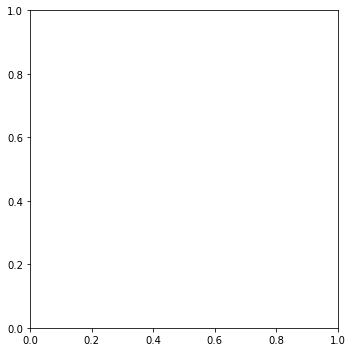

In [92]:
import matplotlib.animation as animation

names = ['Gcm Cubic']#["Gcm Cubic"]

classifiers = [
    MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]
#MLPClassifier(max_iter=100000, random_state=42)]
#MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]

fig, ax = plt.subplots(figsize=(5, 5))
fig.set_tight_layout(True)


base_ids = {0: 0, 6: 0, 12: 0, 18: 0, 1250: 1, 1256: 1, 1262: 1, 1268: 1, 1274: 1, 2500: 1, 2506: 1, 2512: 1, 2518: 1, 2524: 1, 3750: 1, 3756: 1, 3762: 1, 3768: 1, 3774: 1, 5000: 1, 5006: 1, 5012: 1, 5018: 1, 5024: 1, 351: 0, 303: 0, 257: 0, 280: 0, 234: 0, 187: 0, 140: 0, 21: 0, 69: 0, 92: 0, 790: 1, 924: 1, 709: 1, 327: 0, 702: 0, 869: 1, 550: 0, 539: 0, 506: 0, 560: 0, 825: 0, 594: 0, 777: 0, 674: 0, 24: 0, 542: 0, 521: 0, 902: 1, 607: 0, 755: 1, 661: 1, 746: 1, 588: 0, 681: 1, 799: 1, 524: 0, 666: 1, 692: 1, 1075: 1, 696: 1, 635: 1, 641: 1, 629: 0, 1000: 0, 724: 1, 925: 0, 827: 1, 655: 1, 643: 0, 876: 1, 901: 1}
N1 = 25
N2 = 201
strike_energy = np.linspace(0, 50, N2, endpoint=True)
strike_energy = list(map(lambda x: round(x, 5), strike_energy))

protection_thickness = np.linspace(2.0, 8.0, N1, endpoint=True)
protection_thickness = list(map(lambda x: round(x, 5), protection_thickness))

x_train, y_train = [], []
x_test_mid = []
i = 0
for s in strike_energy:
    for p in protection_thickness:
        x_test_mid.append([s, p])
        if i in base_ids:
            x_train.append([s, p])
            y_train.append(base_ids[i])
        i += 1
print(len(y_train))
x_train, y_train = x_train + x_train_2, y_train + y_train_2
print(len(y_train))


datasets = [(np.array(x_train), np.array(y_train))]

def animate(frame):
    print(frame)
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X, y = X[:frame+75], y[:frame+75]
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))



        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            #ax.clear()
            #ax = fig.add_subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X, y)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            
            ###
            '''
            ax.set_xlabel('Strike energy')
            ax.set_ylabel('Protection thickness')
            ax.set_xticks(np.linspace(X[:, 0].min(), X[:, 0].max(), 5, endpoint=True))
            ax.set_yticks(np.linspace(X[:, 1].min(), X[:, 1].max(), 5, endpoint=True))
            ax.set_xticklabels(np.linspace(0, 50, 5, endpoint=True))
            ax.set_yticklabels(np.linspace(2, 8, 5, endpoint=True))
            '''
            ###
            
            
            if ds_cnt == 0:
                ax.set_title(name)
            #ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
            #return ax
            filename = 'img/gcm_2_{}.png'.format(frame)
            plt.savefig(filename)
            ax.clear()

#plt.tight_layout()
#plt.show()

#ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, 10), interval=200)


#plt.show()
#ani.save('1.gif', writer='imagemagick', fps=30)
for i in range(40):
    animate(i)
    #break

In [20]:
import imageio
with imageio.get_writer('img/gcm_2.gif', mode='I') as writer:
    for i in range(40):
        filename = 'img/gcm_2_{}.png'.format(i)
        image = imageio.imread(filename)
        writer.append_data(image)

In [136]:
data_big = '225047334.txt;362060942.txt;360658255.txt;337179470.txt;313727281.txt;288925727.txt;303871650.txt;337276566.txt;290650767.txt;316706867.txt;316711483.txt;317376315.txt;279738722.txt;276808238.txt;278316673.txt;242751610.txt;300670738.txt;255534752.txt;302090339.txt;302090917.txt;217950489.txt;96552698.txt;1;193771303.txt;1;170321436.txt;1;218446599.txt;1;169587104.txt;1;146918182.txt;1;202289579.txt;1;121775666.txt;1;194555658.txt;1;131296219.txt;1;169714884.txt;1;218702058.txt;1;169635922.txt;1;218585030.txt;1;194027653.txt;1;155437213.txt;1;168997243.txt;1;120788621.txt;1;222959743.txt;1;203294984.txt;1;205795871.txt;1;146695259.txt;1;146201099.txt;1;217699358.txt;1;193120679.txt;1;178072364.txt;1;201624383.txt;1;251232896.txt;1;156103929.txt;1;201539497.txt;1;234279363.txt;1;169013939.txt;1;231273304.txt;1;146248154.txt;1;204380561.txt;1;240795667.txt;1;312370257.txt;1;215737063.txt;1;217299951.txt;1;264260478.txt;1;146206053.txt;1;193823493.txt;1;173182986.txt;1;384893957.txt;1;180405556.txt;1;242759397.txt;1;220131598.txt;1;224254125.txt;1;242633128.txt;1;97090714.txt;1;236364600.txt;1;263680564.txt;1;97427969.txt;1;73083435.txt;1;180279071.txt;1;283976296.txt;1;221537029.txt;1;75925349.txt;1;189676196.txt;1;200153035.txt;1;239038963.txt;1;72415171.txt;1;99318731.txt;1;97805538.txt;1;73081001.txt;1;207308956.txt;7451368 [0x7fe394984400] INFO gcm.Engine null - Started step 1191. Current time: 3.86763e-05. Time step: 3.24739e-08.;74598816.txt;1;144948519.txt;1;275756868.txt;1;215068903.txt;1;73751499.txt;1;225755529.txt;1;108577385.txt;1;82938960.txt;1;288231123.txt;1;156853866.txt;1;278930378.txt;1;145947600.txt;1;97235780.txt;1;313725565.txt;1;268492814.txt;1;122068300.txt;1;409994491.txt;1;104320296.txt;1;121483745.txt;1;312372000.txt;1;267012693.txt;0;147038273.txt;1;104317878.txt;1;55878158.txt;1;146372889.txt;1;270189857.txt;1;405408044.txt;1;24140042.txt;1;99406904.txt;1;52453355.txt;1;72444634.txt;1;285394588.txt;1;110001594.txt;1;156201321.txt;1;130627991.txt;1;313705130.txt;1;112087342.txt;1;24891799.txt;1;130631459.txt;1;54627534.txt;1;289610953.txt;1;313749095.txt;14109811 [0x7ff383cc0400] INFO gcm.Engine null - Started step 2401. Current time: 7.79681e-05. Time step: 3.24739e-08.;157437365.txt;1;156103621.txt;1;206561168.txt;1;253693856.txt;1;191683126.txt;1;252757504.txt;1;261840017.txt;1;324852745.txt;1;241456626.txt;0;301047747.txt;0;25476089.txt;1;313070824.txt;1;120606950.txt;1;232792729.txt;1;313712670.txt;1;289012167.txt;1;81521558.txt;1;97257952.txt;1;144161434.txt;1;191766699.txt;1;28399590.txt;1;143574920.txt;1;97591968.txt;1;34580013.txt;1;90036054.txt;1;77466739.txt;1;408954727.txt;0;400458160.txt;0;119936280.txt;1;183623088.txt;1;72458955.txt;0;60975099.txt;1;316706996.txt;0;33245412.txt;1;108606778.txt;1;300974409.txt;1;108422957.txt;1;204457385.txt;1;257885694.txt;1;406825886.txt;1;396211477.txt;0;143995006.txt;1;96594343.txt;0;277663010.txt;1;402047382.txt;0;132665739.txt;1;393382889.txt;0;280402531.txt;1;289734345.txt;0;60899066.txt;1;352159206.txt;0;96589639.txt;0;145573348.txt;0;143407984.txt;1;167555689.txt;1;32580551.txt;1;143412918.txt;1;255569933.txt;1;105029256.txt;1;96594688.txt;0;373753899.txt;0;301133216.txt;0;360673172.txt;0;84368620.txt;1;204502180.txt;1;403283468.txt;0;134991617.txt;1;79464315.txt;1;408412499.txt;1;283924708.txt;1;59473879.txt;1;204503336.txt;1;25479251.txt;1;169713524.txt;0;33241523.txt;1;404786974.txt;0;48986078.txt;0;220574060.txt;0;96592173.txt;0;313046532.txt;1;104264569.txt;1;85898892.txt;1;407877141.txt;0;194014200.txt;0;87318766.txt;1;72702431.txt;0;156221568.txt;1;25309183.txt;1;96238453.txt;1;241874138.txt;0;301879539.txt;1;180359427.txt;1;83784429.txt;0;71928929.txt;1;33995079.txt;1;503289.txt;0;269768137.txt;1;71005124.txt;0;161267205.txt;1;287454724.txt;1;350201955.txt;0;152386248.txt;0;216933668.txt;1;143422455.txt;0;27655557.txt;1;402460805.txt;0;137918611.txt;1;72969780.txt;0;288874581.txt;1;409449692.txt;0;40340786.txt;1;166130196.txt;0;49638486.txt;1;156221874.txt;1;49149661.txt;0;132159691.txt;0;286039781.txt;1;201671731.txt;1;275420364.txt;1;143361364.txt;1;10444885.txt;0;10443890.txt;0;191807285.txt;0;34077460.txt;1;403629401.txt;0;58888101.txt;1;170045882.txt;0;195992166.txt;1;49071486.txt;0;217989399.txt;0;218646044.txt;0;36164763.txt;1;409110711.txt;0;337906329.txt;1;222962054.txt;0;34534055.txt;0;403961775.txt;0;241452836.txt;0;197400566.txt;1;10533224.txt;0;129224126.txt;1;346494241.txt;1;398306725.txt;0;121326704.txt;0;201681847.txt;0;47032004.txt;0;119975239.txt;0;38171688.txt;1;49054094.txt;0;32657807.txt;1;119975256.txt;0;167567988.txt;0;408936091.txt;1;34083827.txt;1;167567699.txt;0;162687063.txt;0;194516779.txt;0;95383285.txt;0;34083828.txt;1;288236047.txt;1;408308609.txt;0;369909879.txt;0;251452545.txt;1;197495544.txt;0;39043645.txt;0;84383648.txt;0;275590114.txt;1;410321163.txt;0;99355403.txt;0;85803505.txt;0;34587512.txt;0;350201115.txt;0;31909815.txt;1;271266103.txt;0;31909797.txt;1;271261190.txt;0;384798539.txt;0;151946497.txt;1;78620426.txt;0;8452791.txt;0;174766086.txt;0;33329655.txt;1;34746486.txt;1;47366089.txt;0;23638909.txt;0;10024849.txt;0;288287615.txt;1;105532412.txt;0;339426453.txt;0;232640903.txt;0;47363633.txt;1;36166054.txt;1;271192609.txt;0;330826483.txt;0;324449606.txt;0;26230403.txt;1;150531552.txt;1;39620863.txt;0;17457138.txt;0;180351121.txt;0;409834673.txt;0;251369024.txt;1;58219296.txt;0;204488690.txt;0;33005686.txt;0;8608995.txt;0;73545867.txt;0;74627024.txt;0;251368735.txt;1;9941345.txt;0;176435929.txt;0;156135990.txt;0;239980365.txt;0;12027194.txt;0;156629432.txt;1;147709344.txt;1;350699944.txt;0;168241128.txt;0;264154670.txt;0;264111183.txt;0;12027500.txt;0;46688383.txt;1;107906310.txt;0;24975363.txt;1;1346306.txt;0;288292239.txt;0;216525548.txt;0;192290042.txt;0;289065960.txt;0;338927912.txt;1;83768741.txt;0;312378545.txt;0;4677762.txt;0;315873378.txt;1;156205969.txt;1;11193267.txt;0;75212240.txt;0;168333914.txt;0;216486155.txt;0;240614200.txt;0;207268760.txt;0;83516112.txt;0;168142716.txt;0;23747427.txt;0;103671697.txt;0;364317973.txt;1;24982509.txt;1;30677052.txt;0;11277367.txt;0;83599633.txt;0;97929400.txt;1;14036296.txt;0;169523057.txt;1;409618639.txt;1;207998332.txt;1;240933639.txt;0;192380813.txt;0;227324514.txt;0;65743181.txt;1;84144662.txt;1;73800200.txt;0;25154411.txt;1;240938552.txt;0;180348177.txt;1;195247659.txt;1;392460679.txt;0;25070584.txt;1;410137104.txt;1;361012221.txt;1;216348865.txt;0;156294419.txt;1;59500476.txt;1;91310720.txt;1;377654787.txt;0;235740258.txt;0;288260176.txt;0;137453361.txt;0;308740479.txt;1;385246567.txt;1;259839017.txt;1;81725451.txt;1;23221150.txt;0;395020160.txt;1;369914295.txt;0;227812410.txt;1;230898080.txt;1;391796976.txt;1;197252035.txt;1;409790727.txt;0;130641595.txt;1;43516905.txt;0;409583843.txt;0;207392705.txt;1;227091006.txt;1;131501260.txt;0;64908124.txt;0;58415281.txt;1;410299359.txt;0;86579213.txt;0;312658458.txt;1;203037247.txt;1;157630755.txt;1;180238047.txt;1;24815460.txt;1;360604539.txt;0;290318723.txt;1;305802451.txt;0;134174107.txt;0;1339662.txt;0;299638973.txt;0;339928211.txt;1;298218755.txt;0;252770.txt;0;1339373.txt;0;109275096.txt;0;133665141.txt;1;232318243.txt;1;265594185.txt;0;45443235.txt;0;48068817.txt;0;256446632.txt;1;73854561.txt;1;318045341.txt;1;82445141.txt;1;298820814.txt;1;168950409.txt;0;88006288.txt;0;288520890.txt;1;58174956.txt;0;70948641.txt;0;248028066.txt;1;120731755.txt;1;247944563.txt;1;37589175.txt;1;100515933.txt;1;36839976.txt;0;168239904.txt;0;25061654.txt;1;191975492.txt;1;408911454.txt;0;10691860.txt;0;393300048.txt;1;259844218.txt;1;395025073.txt;1;71161489.txt;0;155299827.txt;0;271497201.txt;0;72385559.txt;0;59840053.txt;0;24820390.txt;1;144775663.txt;0;256374867.txt;1;157797816.txt;1;159222583.txt;1;155933435.txt;1;183699773.txt;1;242795288.txt;0;103526463.txt;1;232316405.txt;0;234993489.txt;1;266932312.txt;0;391962081.txt;0;232316406.txt;0;122086195.txt;0;86577026.txt;0;290318949.txt;1;114983622.txt;0;119945680.txt;0;241709486.txt;0;144786035.txt;0;396127030.txt;0;181490878.txt;1;34081586.txt;0;36537692.txt;0;232318260.txt;1;393452675.txt;0;124841811.txt;0;193047946.txt;0;231451633.txt;0;145385488.txt;0;120631456.txt;0;25159323.txt;0;405155177.txt;1;36620924.txt;0;343661890.txt;0;191965717.txt;1;2950.txt;0;384800609.txt;0;57587592.txt;0;122151629.txt;1;408073515.txt;1;178816446.txt;1;78886027.txt;0;31241638.txt;1;191970902.txt;1;754282.txt;0;394775717.txt;0;29821781.txt;1;2174139.txt;0;83727226.txt;0;234292283.txt;0;123493066.txt;1;72445142.txt;1;224966374.txt;1;314454341.txt;1;107930239.txt;0;274508792.txt;1;71432723.txt;0;242790908.txt;0;221964550.txt;1;197173426.txt;1;361029812.txt;0;123655296.txt;1;68676531.txt;0;386159471.txt;0;157719206.txt;0;130125429.txt;1;257011328.txt;0;390539291.txt;0;130036995.txt;1;186665100.txt;1;85871938.txt;1;409636178.txt;0;72443714.txt;1;73861760.txt;1;208009314.txt;1;409623553.txt;1;385485984.txt;1;130641515.txt;1;49304233.txt;0;96676841.txt;0;399643099.txt;1;288778673.txt;0;168222274.txt;0;208092852.txt;1;47533279.txt;1;218231261.txt;0;266097633.txt;0;34926006.txt;0;67490160.txt;0;119268113.txt;1;385582132.txt;0;72617591.txt;0;124745149.txt;1;48473443.txt;0;393216273.txt;0;61005588.txt;1;290318660.txt;0;300152543.txt;0;300157728.txt;0;385304212.txt;1;83773585.txt;1;112338345.txt;1;5097094.txt;0;408742022.txt;0;405160090.txt;1;396786017.txt;0;214609717.txt;0;190555975.txt;0;256274421.txt;0;194518692.txt;0;260359426.txt;1;274745212.txt;1;107862748.txt;0;269770220.txt;1;349328766.txt;0;109282605.txt;0;242710038.txt;0;73789808.txt;0;248470316.txt;0;410087851.txt;0;256278995.txt;1;252027195.txt;1;83753059.txt;0;95130577.txt;1;145552801.txt;0;269018097.txt;0;145552817.txt;0;337640893.txt;0;256357942.txt;0;273504964.txt;0;402217525.txt;1;49721650.txt;0;208697252.txt;0;307821236.txt;1;252648466.txt;0;210148590.txt;0;161107674.txt;1;73375655.txt;0;120987255.txt;1;47528078.txt;1;314454355.txt;1;184471589.txt;0;35438336.txt;1;208014516.txt;1;169017688.txt;1;403121629.txt;1;232158689.txt;0;271239261.txt;1;403205151.txt;1;241164329.txt;0;3429170.txt;0;91246837.txt;1;24742013.txt;0;361353037.txt;1;406663195.txt;0;232158690.txt;0;4263793.txt;0;409120368.txt;1;31246278.txt;0;34246516.txt;1;123571197.txt;0;34916675.txt;1;97678094.txt;1;217227546.txt;0;25159192.txt;0;46782036.txt;0;207313860.txt;0;48201604.txt;0;223467945.txt;0;25408599.txt;0;162527242.txt;0;327279478.txt;0;322862894.txt;0;88200776.txt;1;329377239.txt;0;401962033.txt;0;202067603.txt;1;160796593.txt;1;93710739.txt;0;95130579.txt;0;409616070.txt;0;131712362.txt;0;206515167.txt;1;170437545.txt;0;386282188.txt;1;179345268.txt;1;144876998.txt;1;410206300.txt;0;410308735.txt;98014068.txt;0;251287085.txt;1;409699591.txt;0;60395797.txt;0;291736340.txt;1;410284918.txt;218653357.txt;0;5262842.txt;0;27659597.txt;1;193096369.txt;0;154430060.txt;0;123497979.txt;0;167968228.txt;1;301422155.txt;0;241444301.txt;1;34023392.txt;1;136320876.txt;1;217301802.txt;1;391039487.txt;1;91163316.txt;0;91246854.txt;0;337127340.txt;1;217238001.txt;0;264712532.txt;0;233800039.txt;0;198760309.txt;1;193329839.txt;1;98186023.txt;0;402222438.txt;0;395217053.txt;0;387869110.txt;1;119898304.txt;0;113674681.txt;0;193246607.txt;1;35448162.txt;1;61056146.txt;1;398281165.txt;0;198593266.txt;1;73862195.txt;0;181756196.txt;1;10774209.txt;0;408953632.txt;0;251874618.txt;0;39674787.txt;1;304347940.txt;1;396187001.txt;0;290316772.txt;0;156903693.txt;0;79472415.txt;0;183259863.txt;1;98000681.txt;1;35582563.txt;1;329404239.txt;1;191676370.txt;0;409275045.txt;0;60398287.txt;0;193164233.txt;1;46113141.txt;1;384835009.txt;0;35499042.txt;1;155798160.txt;1;160801488.txt;1;95717361.txt;1;253482196.txt;1;182263803.txt;1;305266959.txt;1;23636451.txt;0;409446132.txt;0;63896133.txt;0;287346723.txt;1;284836027.txt;0;96490270.txt;0;74874986.txt;0;398191889.txt;1;66069938.txt;1;62409703.txt;1;193144803.txt;1;394765854.txt;0;309993611.txt;1;393351182.txt;0;393349589.txt;1;159631559.txt;1;205060122.txt;1;246015034.txt;1;154739864.txt;0;47523517.txt;1;264094556.txt;1;32502095.txt;0;159715080.txt;1;173203003.txt;0;169358044.txt;0;194515597.txt;0;96408207.txt;0;48466736.txt;1;57988152.txt;1;39091584.txt;238534310.txt;0;313156541.txt;0;252707519.txt;0;306686544.txt;389372777.txt;1;306686833.txt;403260042.txt;0;386161970.txt;391127920.txt;0;11275439.txt;0;313743890.txt;0;25071029.txt;1;212489260.txt;1;199754755.txt;278790242.txt;1;370581435.txt;0;169024956.txt;0;398449485.txt;0;393298508.txt;1;169026647.txt;0;134905659.txt;0;25479965.txt;1;394636095.txt;0;115023003.txt;1;169026663.txt;0;215776495.txt;97930285.txt;1;177846802.txt;0;275253830.txt;1;145130071.txt;0;288784767.txt;0;394383934.txt;184684616.txt;1;266343719.txt;0;24820526.txt;0;96497762.txt;0;288784478.txt;0;82370215.txt;0;362058655.txt;0;145465628.txt;0;396858652.txt;1;35417533.txt;1;34921588.txt;0;410338503.txt;393354569.txt;0;47449841.txt;0;309162178.txt;0;4512719.txt;0;72443255.txt;1;47454383.txt;1;393349675.txt;0;275950256.txt;1;396777523.txt;1;400290929.txt;0;121825201.txt;0;400374450.txt;0;374652000.txt;0;203517855.txt;1;217980272.txt;0;202274865.txt;1;96510683.txt;1;41106501.txt;1;350175367.txt;1;71997933.txt;0;244213083.txt;0;245632651.txt;0;277492804.txt;1;197094529.txt;1;194170012.txt;0;71997644.txt;0;182270358.txt;1;71579503.txt;1;158462451.txt;1;298169800.txt;1;390876445.txt;0;75534630.txt;0;289454113.txt;65429938 [0x7f8a61c6d400] INFO gcm.Engine null - Started step 7283. Current time: 0.000236525. Time step: 3.24739e-08.;99183824.txt;0;397473348.txt;1;184684633.txt;0;405445528.txt;0;36420214.txt;0;73370620.txt;0;403882735.txt;1;97931010.txt;0;35364932.txt;0;72338294.txt;0;247268949.txt;0;193036886.txt;0;239956698.txt;0;47528140.txt;1;43263979.txt;0;337884238.txt;0;167472320.txt;0;228484361.txt;0;144749406.txt;0;59570119.txt;0;98859215.txt;0;157551525.txt;1;258120162.txt;0;399943047.txt;1;312632966.txt;0;24992420.txt;0;116388697.txt;0;217234093.txt;0;120647400.txt;0;156884889.txt;0;217070795.txt;0;87972059.txt;0;58165306.txt;0;70098403.txt;409483913.txt;398278221.txt;335118450.txt;119689536.txt;223896914.txt;0;194577206.txt;1;393379575.txt;1;216670223.txt;0;339510377.txt;1;301116188.txt;1;289449216.txt;0;265217723.txt;0;233495252.txt;1;235303135.txt;0;62992004.txt;0;48718433.txt;0;168910784.txt;0;232554769.txt;1;401788607.txt;0;212752449.txt;0;170275631.txt;0;85130713.txt;0'
base_ids_big = {0: 0, 16: 0, 272: 0, 288: 0, 4624: 0, 4640: 0, 4896: 0, 4912: 0, 78608: 0, 78624: 0, 78880: 0, 78896: 0, 83232: 0, 83248: 0, 83504: 0, 83520: 0, 1336336: 0, 1336352: 0, 1336608: 0, 1336624: 0, 1340960: 0, 1340976: 0, 1341232: 0, 1341248: 0, 1414944: 0, 1414960: 0, 1415216: 0, 1415232: 0, 1419568: 0, 1419584: 0, 1419840: 0, 1419856: 0, 19877998: 0, 19878014: 0, 19878270: 0, 19878286: 0, 19882622: 0, 19882638: 0, 19882894: 0, 19882910: 0, 19956606: 0, 19956622: 0, 19956878: 0, 19956894: 0, 19961230: 0, 19961246: 0, 19961502: 0, 19961518: 0, 21214334: 0, 21214350: 0, 21214606: 0, 21214622: 0, 21218958: 0, 21218974: 0, 21219230: 0, 21219246: 0, 21292942: 0, 21292958: 0, 21293214: 0, 21293230: 0, 21297566: 0, 21297582: 0, 21297838: 0, 21297854: 0, 386201104: 1, 386201120: 1, 386201376: 1, 386201392: 1, 386205728: 1, 386205744: 1, 386206000: 1, 386206016: 1, 386279712: 1, 386279728: 1, 386279984: 1, 386280000: 1, 386284336: 1, 386284352: 1, 386284608: 1, 386284624: 1, 387537440: 1, 387537456: 1, 387537712: 1, 387537728: 1, 387542064: 1, 387542080: 1, 387542336: 1, 387542352: 1, 387616048: 1, 387616064: 1, 387616320: 1, 387616336: 1, 387620672: 1, 387620688: 1, 387620944: 1, 387620960: 1, 406079102: 1, 406079118: 1, 406079374: 1, 406079390: 1, 406083726: 1, 406083742: 1, 406083998: 1, 406084014: 1, 406157710: 0, 406157726: 0, 406157982: 0, 406157998: 0, 406162334: 0, 406162350: 0, 406162606: 0, 406162622: 0, 407415438: 1, 407415454: 1, 407415710: 1, 407415726: 1, 407420062: 1, 407420078: 1, 407420334: 1, 407420350: 1, 407494046: 1, 407494062: 1, 407494318: 0, 407494334: 0, 407498670: 1, 407498686: 1, 407498942: 0, 407498958: 0}
base_ids_big_2 = {}
def convert_17(num):
    to_base = 17
    alphabet = range(to_base)
    res = []
    while num > 0:
        num, m = divmod(num, to_base)
        res.append(alphabet[m])
    while len(res) < 7:
        res.append(0)
    return res[::-1]

ls_big = data_big.split(';')
x_train_big, y_train_big = [], []
#print(ls)

for i in base_ids_big:
    x_train_big.append(convert_17(i))
    y_train_big.append(base_ids_big[i])
    
    base_ids_big_2[i] = base_ids_big[i]

for i in range(len(ls_big)-1):
    if 'txt' in ls_big[i]:
        if ls_big[i+1] in '01':
            t_id = int(ls_big[i].replace('.txt', ''))
            #print(t_id, ls_big[i+1], convert_17(t_id))
            x_train_big.append(convert_17(t_id))
            y_train_big.append(int(ls_big[i+1]))
            
            base_ids_big_2[t_id] = int(ls_big[i+1])

print(len(y_train_big), len(base_ids_big_2))
print(base_ids_big_2)
            


987 987
{0: 0, 16: 0, 272: 0, 288: 0, 4624: 0, 4640: 0, 4896: 0, 4912: 0, 78608: 0, 78624: 0, 78880: 0, 78896: 0, 83232: 0, 83248: 0, 83504: 0, 83520: 0, 1336336: 0, 1336352: 0, 1336608: 0, 1336624: 0, 1340960: 0, 1340976: 0, 1341232: 0, 1341248: 0, 1414944: 0, 1414960: 0, 1415216: 0, 1415232: 0, 1419568: 0, 1419584: 0, 1419840: 0, 1419856: 0, 19877998: 0, 19878014: 0, 19878270: 0, 19878286: 0, 19882622: 0, 19882638: 0, 19882894: 0, 19882910: 0, 19956606: 0, 19956622: 0, 19956878: 0, 19956894: 0, 19961230: 0, 19961246: 0, 19961502: 0, 19961518: 0, 21214334: 0, 21214350: 0, 21214606: 0, 21214622: 0, 21218958: 0, 21218974: 0, 21219230: 0, 21219246: 0, 21292942: 0, 21292958: 0, 21293214: 0, 21293230: 0, 21297566: 0, 21297582: 0, 21297838: 0, 21297854: 0, 386201104: 1, 386201120: 1, 386201376: 1, 386201392: 1, 386205728: 1, 386205744: 1, 386206000: 1, 386206016: 1, 386279712: 1, 386279728: 1, 386279984: 1, 386280000: 1, 386284336: 1, 386284352: 1, 386284608: 1, 386284624: 1, 387537440: 1, 

In [87]:
N1 = 25
N2 = 201
strike_energy = np.linspace(0, 17, N2, endpoint=True)
strike_energy = list(map(lambda x: round(x, 5), strike_energy))

protection_thickness = np.linspace(2, 14, N1, endpoint=True)
protection_thickness = list(map(lambda x: round(x, 5), protection_thickness))

x_test_big, y_test_big = [], y_train
for s in strike_energy:
    for p in protection_thickness:
        #print(s, p, 4, 10.666666667, 10.666666667, 0, 0)
        x_test_big.append([s, p, 4, 10.666666667, 10.666666667, 0, 0])
        pass
N = 17
'''
rangee = lambda start, stop, N: tuple(enumerate(tuple(map(lambda x: round(x, 5), np.linspace(start, stop, N, endpoint=True)))))

protection_thickness = rangee(2.0, 8.0, N1)
print(protection_thickness[:10])
print(protection_thickness[-9:])
print()
protection_thickness = rangee(1.0, 9.0, N)
print(protection_thickness[:10])
print(protection_thickness[-9:])
print()
protection_thickness = rangee(2, 14, N1)
print(protection_thickness[:10])
print(protection_thickness[-9:])
'''

rangee = lambda start, stop, N: tuple(enumerate(tuple(map(lambda x: round(x, 5), np.linspace(start, stop, N, endpoint=True)))))

strike_energy2 = rangee(0, 50, N)
protection_thickness2 = rangee(1.0, 9.0, N)
strike_duration2 = rangee(0.5e-4, 2.5e-4, N)
material_strength_limit2 = rangee(1e7, 7e7, N)
contact_strength_limit2 = rangee(1e7, 7e7, N)
target_thickness2 = rangee(8.0, 16.0, N)
width2 = rangee(8.0, 16.0, N)

print(strike_duration2[4], 1e-04)
print(material_strength_limit2[10], 5e7)#10.666666667
print(contact_strength_limit2[10], 5e7)#10.666666667
print(target_thickness2[0], 8)
print(width2[0], 8)

(4, 0.0001) 0.0001
(10, 47500000.0) 50000000.0
(10, 47500000.0) 50000000.0
(0, 8.0) 8
(0, 8.0) 8


In [259]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score, f1_score
from sklearn.neural_network import MLPClassifier

print(len(x_train))
print(len(x_test_mid))
print(len(x_test_big))

model_small = MLPClassifier(max_iter=100000, random_state=42)
model_small.fit(x_train, y_train)
y_pred_mid = model_small.predict(x_test_mid)

model_big = MLPClassifier(max_iter=100000, random_state=42)
model_big.fit(x_train_big[:200], y_train_big[:200])
y_pred = model_big.predict(x_test_big)
print(len(y_pred), len(y_pred_mid))
score = accuracy_score(y_pred_mid, y_pred)
print(score)
#print(y_pred_mid, y_pred)

accuracy = accuracy_score(y_pred_mid, y_pred)
print('Accuracy: {}'.format(accuracy))

cm = confusion_matrix(y_pred_mid, y_pred)
print('Confusion matrix:\n{}'.format(cm))

print('Precision, recall and f1-score:')
print(classification_report(y_pred_mid, y_pred))

roc = roc_auc_score(y_pred_mid, y_pred)
print('ROC AUC: {}'.format(roc))

pr = average_precision_score(y_pred_mid, y_pred)
print('PR AUC: {}'.format(pr))

f1 = f1_score(y_pred_mid, y_pred)
print('F1 score: {}'.format(f1))

114
5025
5025
5025 5025
0.5842786069651741
Accuracy: 0.5842786069651741
Confusion matrix:
[[ 679    0]
 [2089 2257]]
Precision, recall and f1-score:
              precision    recall  f1-score   support

           0       0.25      1.00      0.39       679
           1       1.00      0.52      0.68      4346

    accuracy                           0.58      5025
   macro avg       0.62      0.76      0.54      5025
weighted avg       0.90      0.58      0.64      5025

ROC AUC: 0.75966405890474
PR AUC: 0.9350495108443058
F1 score: 0.6836286536422838


In [137]:
print(len(x_train_big), len(y_train_big))
print(x_train_big)

987 987
[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 16], [0, 0, 0, 0, 0, 16, 0], [0, 0, 0, 0, 0, 16, 16], [0, 0, 0, 0, 16, 0, 0], [0, 0, 0, 0, 16, 0, 16], [0, 0, 0, 0, 16, 16, 0], [0, 0, 0, 0, 16, 16, 16], [0, 0, 0, 16, 0, 0, 0], [0, 0, 0, 16, 0, 0, 16], [0, 0, 0, 16, 0, 16, 0], [0, 0, 0, 16, 0, 16, 16], [0, 0, 0, 16, 16, 0, 0], [0, 0, 0, 16, 16, 0, 16], [0, 0, 0, 16, 16, 16, 0], [0, 0, 0, 16, 16, 16, 16], [0, 0, 16, 0, 0, 0, 0], [0, 0, 16, 0, 0, 0, 16], [0, 0, 16, 0, 0, 16, 0], [0, 0, 16, 0, 0, 16, 16], [0, 0, 16, 0, 16, 0, 0], [0, 0, 16, 0, 16, 0, 16], [0, 0, 16, 0, 16, 16, 0], [0, 0, 16, 0, 16, 16, 16], [0, 0, 16, 16, 0, 0, 0], [0, 0, 16, 16, 0, 0, 16], [0, 0, 16, 16, 0, 16, 0], [0, 0, 16, 16, 0, 16, 16], [0, 0, 16, 16, 16, 0, 0], [0, 0, 16, 16, 16, 0, 16], [0, 0, 16, 16, 16, 16, 0], [0, 0, 16, 16, 16, 16, 16], [0, 14, 0, 0, 0, 0, 0], [0, 14, 0, 0, 0, 0, 16], [0, 14, 0, 0, 0, 16, 0], [0, 14, 0, 0, 0, 16, 16], [0, 14, 0, 0, 16, 0, 0], [0, 14, 0, 0, 16, 0, 16], [0, 14, 0, 0, 16, 16, 0]

5025 5025
0


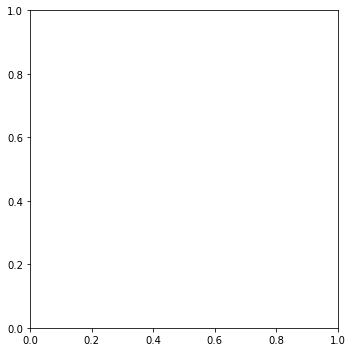

In [148]:
import matplotlib.animation as animation

names = ['Gcm Cubic Big']

classifiers = [
    MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]
#MLPClassifier(max_iter=100000, random_state=42)]
#MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]

fig, ax = plt.subplots(figsize=(5, 5))
fig.set_tight_layout(True)


N1 = 25
N2 = 201
strike_energy = np.linspace(0, 50, N2, endpoint=True)
strike_energy = list(map(lambda x: round(x, 5), strike_energy))

protection_thickness = np.linspace(2.0, 8.0, N1, endpoint=True)
protection_thickness = list(map(lambda x: round(x, 5), protection_thickness))

x_train_mid, y_train_mid = [], y_pred_mid
#x_test_mid = []
i = 0
for s in strike_energy:
    for p in protection_thickness:
        x_train_mid.append([s, p])
        i += 1
#print(len(y_train))
#x_train, y_train = x_train + x_train_2, y_train + y_train_2
print(len(y_train_mid), len(x_train_mid))


datasets = [(np.array(x_train_mid), np.array(y_train_mid))]

def animate(frame):
    print(frame)
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        #X, y = X[:frame+75], y[:frame+75]
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))



        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            #ax.clear()
            #ax = fig.add_subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X, y)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
            # Plot the testing points
            #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            
            ###
            '''
            ax.set_xlabel('Strike energy')
            ax.set_ylabel('Protection thickness')
            ax.set_xticks(np.linspace(X[:, 0].min(), X[:, 0].max(), 5, endpoint=True))
            ax.set_yticks(np.linspace(X[:, 1].min(), X[:, 1].max(), 5, endpoint=True))
            ax.set_xticklabels(np.linspace(0, 50, 5, endpoint=True))
            ax.set_yticklabels(np.linspace(2, 8, 5, endpoint=True))
            '''
            ###
            
            
            if ds_cnt == 0:
                ax.set_title(name)
            #ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
            #return ax
            filename = 'img/gcm_big_1_{}.png'.format(frame)
            plt.savefig(filename)
            ax.clear()

#plt.tight_layout()
#plt.show()

#ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, 10), interval=200)


#plt.show()
#ani.save('1.gif', writer='imagemagick', fps=30)
for i in range(40):
    animate(i)
    break

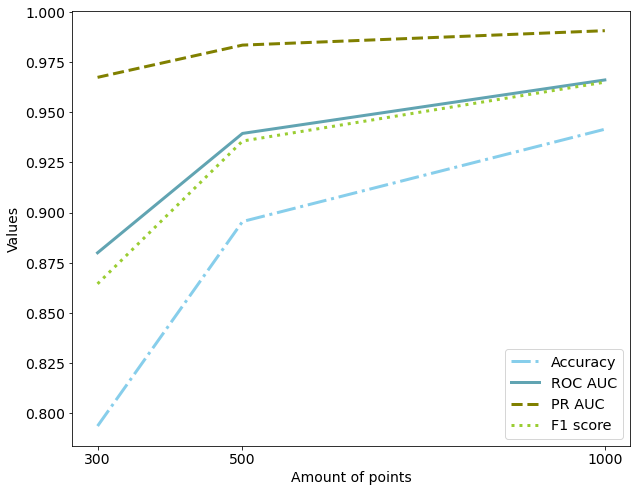

In [241]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df = pd.DataFrame({'x_values': [300, 500, 1000], 'y1_values': [0.7934, 0.8955, 0.9416], 'y2_values': [0.8799, 0.9395, 0.9662], 'y3_values': [0.9675, 0.9836, 0.9908], 'y4_values': [0.8644, 0.9357, 0.9651] })
plt.rcParams["figure.figsize"] = (10, 8)
# multiple line plots
plt.plot( 'x_values', 'y1_values', data=df, marker='', color='skyblue', linewidth=3, linestyle='-.', label="Accuracy")
plt.plot( 'x_values', 'y2_values', data=df, marker='', color='#61a4b2', linewidth=3, label="ROC AUC")
plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=3, linestyle='dashed', label="PR AUC")
plt.plot( 'x_values', 'y4_values', data=df, marker='', color='yellowgreen', linewidth=3, linestyle='dotted', label="F1 score")

plt.xticks([300, 500, 1000], [300, 500, 1000], fontsize=14)
plt.yticks(fontsize=14)
# show legend
plt.legend(loc="lower right", fontsize="x-large")
plt.xlabel("Amount of points", fontsize=14)
plt.ylabel("Values", fontsize=14)

# show graph
plt.show()

In [242]:
data_big_2 = '362007060.txt;386142725.txt;409620204.txt;289250795.txt;48193942.txt;110355839.txt;328351875.txt;396138204.txt;408956199.txt;2004589.txt;160413581.txt;54810673.txt;393047221.txt;51644147.txt;250187588.txt;221635243.txt;290565554.txt;26235132.txt;1;265577255.txt;1;48299406.txt;1;362142278.txt;1;35250554.txt;1;96585159.txt;1;387701705.txt;1;363566766.txt;1;228621950.txt;1;43268536.txt;1;162265986.txt;48115338.txt;1;329453938.txt;1;49718573.txt;1;48716453.txt;1;302593404.txt;1;241448059.txt;0;315956459.txt;1;257021010.txt;1;384791349.txt;1;128448362.txt;1;97926191.txt;1;197406176.txt;0;247105703.txt;0;158385430.txt;1;217973252.txt;1;137251953.txt;1;276074041.txt;1;326037815.txt;1;202067779.txt;1;403268849.txt;0;155825962.txt;1;33412445.txt;1;403986249.txt;1;91489604.txt;1;256530749.txt;1;184930957.txt;1;148470554.txt;1;397592556.txt;0;302341481.txt;1;387950924.txt;1;217553626.txt;1;360668097.txt;0;32743679.txt;1;239913758.txt;1;49636719.txt;1;39842549.txt;0;228620776.txt;0;36851845.txt;1;399528801.txt;1;198822207.txt;0;26987783.txt;1;252759198.txt;1;404681869.txt;1;32580788.txt;1;266997384.txt;1;144286174.txt;1;398366639.txt;1;363562134.txt;1;329859737.txt;1;165212252.txt;1;391943959.txt;0;41094788.txt;1;343179871.txt;1;402472703.txt;1;329853476.txt;1;397595852.txt;1;329424144.txt;0;228621661.txt;1;67577893.txt;1;241523768.txt;1;363562118.txt;1;112597498.txt;1;389288604.txt;1;134859560.txt;1;135829534.txt;1;399942163.txt;1;233251042.txt;0;389124194.txt;1;387703604.txt;1;49554023.txt;1;307596311.txt;1;705.txt;0;145626249.txt;1;73792682.txt;0;389124193.txt;0;181751633.txt;1;192906352.txt;1;49637959.txt;1;255397118.txt;1;238557666.txt;1;149806708.txt;0;277620390.txt;0;173035839.txt;1;72447088.txt;1;192204856.txt;0;273590103.txt;1;265665795.txt;1;204484109.txt;1;66002120.txt;1;274663380.txt;1;276840440.txt;1;131864920.txt;1;392026765.txt;0;167727024.txt;0;171440563.txt;1;256993843.txt;131776520.txt;1;205903966.txt;1;274658773.txt;1;200185097.txt;319381258.txt;1;339426856.txt;0;241444565.txt;1;75283275.txt;0;165808933.txt;1;196835860.txt;1;198765189.txt;49637477.txt;1;239977524.txt;0;159965828.txt;1;191641406.txt;1;104305880.txt;0;98766022.txt;1;153359424.txt;1;47277340.txt;1;116692827.txt;0;265587098.txt;0;229126315.txt;1;47778755.txt;1;503163.txt;0;216759364.txt;1;73863435.txt;0;200943732.txt;0;32660174.txt;1;25485167.txt;1;144412716.txt;1;408317815.txt;0;82445291.txt;1;395360609.txt;0;37587916.txt;364981992.txt;0;323114886.txt;1;214360939.txt;1;341765250.txt;1;266177075.txt;0;216675556.txt;228626559.txt;1;228626558.txt;1;135319801.txt;1;256306311.txt;0;390534504.txt;0;216348705.txt;0;275425545.txt;135319512.txt;1;366903656.txt;0;396694001.txt;1;394882987.txt;1;191646320.txt;178353379.txt;0;275442279.txt;0;276845369.txt;215692957.txt;1;223815263.txt;0;36768612.txt;1;26910194.txt;258361575.txt;1;297142965.txt;0;102847270.txt;0;112781457.txt;1;403902745.txt;0;25484028.txt;1;241169405.txt;26909921.txt;363566035.txt;1;47297168.txt;0;167552691.txt;1;130371368.txt;1;303896801.txt;1;205069060.txt;1;52554207.txt;0;154779264.txt;1;403623774.txt;1;38192806.txt;34077774.txt;0;37419053.txt;0;145552504.txt;0;131874746.txt;1;204477313.txt;1;129222144.txt;1;250349575.txt;1;407214192.txt;0;48388129.txt;0;181019653.txt;249870454.txt;0;145462097.txt;1;283463349.txt;1;150483466.txt;0;157879408.txt;1;48388127.txt;0;401355305.txt;1;404686767.txt;0;402433056.txt;1;410338503.txt;0;309025687.txt;1;394218932.txt;0;140570133.txt;1;402288670.txt;1;401313611.txt;0;204489022.txt;0;45941344.txt;1;19545957.txt;0;161501041.txt;1;394799467.txt;0;138828260.txt;1;312968207.txt;0;302509884.txt;0;161584562.txt;1;286307107.txt;394799466.txt;0;24737785.txt;0;89054834.txt;1;398060810.txt;0;255531143.txt;31245213.txt;0;95803662.txt;0;44939078.txt;1;306181656.txt;46201321.txt;0;304643727.txt;1;371830645.txt;0;348672312.txt;1;6935919.txt;129310272.txt;1;89059747.txt;137363472.txt;253697306.txt;0;266677922.txt;70242878.txt;1;302481857.txt;0;4178875.txt;290984153.txt;1;290984408.txt;1;219231931.txt;252928005.txt;1;401361748.txt;1;326144651.txt;304643743.txt;1;394798569.txt;0;38689881.txt;0;160222612.txt;326038121.txt;1;199584181.txt;0;374672944.txt;0;127410084.txt;255569073.txt;1;347677686.txt;1;410252898.txt;0;59565438.txt;0;193835173.txt;0;107815785.txt;1;157702498.txt;0;153796535.txt;0;106014375.txt;0;393045173.txt;0;168343087.txt;1;112781459.txt;1;112869890.txt;1;305265311.txt;0;250604149.txt;1;217303369.txt;1;161297249.txt;1;185608210.txt;1;71662735.txt;1;67489795.txt;0;398366656.txt;0;308752299.txt;1;279707581.txt;0;301717434.txt;289507182.txt;289601855.txt;0;24486112.txt;1;295327212.txt;280589695.txt;47887878.txt;0;13367117.txt;0;404197129.txt;295243691.txt;224371610.txt;1;317710880.txt;1;47110604.txt;1;251122919.txt;140570457.txt;1;41099699.txt;214273117.txt;1;389287549.txt;1;302461417.txt;1;258701648.txt;1;169437253.txt;1;167557342.txt;1;183947770.txt;1;250354470.txt;276842915.txt;0;25405548.txt;0;165129019.txt;1;358853985.txt;0;113125366.txt;159965811.txt;254738478.txt;1;36851863.txt;1;184530647.txt;1;408928504.txt;1;403211224.txt;122074437.txt;0;193032044.txt;0;394636565.txt;0;185608211.txt;1;409775691.txt;402288381.txt;1;409701835.txt;312882364.txt;87146516.txt;242543249.txt;0;397545214.txt;239975655.txt;0;238494224.txt;290903444.txt;1;207252293.txt;0;312882347.txt;279986860.txt;1;305716197.txt;0;71495694.txt;26243912.txt;0;252756032.txt;1;122073991.txt;0;205839935.txt;0;400379817.txt;203534903.txt;401534860.txt;0;360653780.txt;1;297307186.txt;1;109849640.txt;402288687.txt;154425450.txt;0;33748825.txt;403226173.txt;0;41094786.txt;1;168419748.txt;0;257114443.txt;1;121576820.txt;72373114.txt;0;400384730.txt;47199021.txt;0;396778663.txt;1;76627464.txt;126840116.txt;392546757.txt;328517655.txt;1;187370088.txt;141990008.txt;1;257026009.txt;1;251853240.txt;1;227677385.txt;120604605.txt;201642468.txt;1;135236313.txt;0;265679042.txt;402858106.txt;1;82357485.txt;1;400850479.txt;1;207484357.txt;1;194421865.txt;43517603.txt;82362093.txt;0;145631162.txt;0;295546657.txt;0;289628318.txt;0;135319851.txt;0;82361787.txt;0;280589694.txt;1;328429983.txt;1;48721078.txt;0;162231897.txt;1;88894739.txt;1;145714683.txt;0;140584411.txt;1;52557883.txt;0;391461130.txt;1;155722446.txt;0;266515505.txt;0;230051234.txt;1;141990603.txt;0;231538117.txt;0;293824106.txt;1;161308939.txt;1;367322965.txt;1;32590308.txt;0;168852593.txt;0;32590597.txt;0;283194873.txt;1;249447639.txt;1;271329763.txt;0;144289328.txt;0;110685550.txt;0;25239587.txt;0;212931308.txt;1;278738760.txt;12821246 [0x7f92e2af5400] INFO gcm.Engine null - Started step 1198. Current time: 3.89036e-05. Time step: 3.24739e-08.;396699204.txt;0;386137522.txt;312312082.txt;207253000.txt;410293755.txt;49644708.txt;184442345.txt;407461201.txt;299570171.txt;335852968.txt;400284803.txt;409945611.txt;289162706.txt;163060621.txt;24142634.txt;1;48290141.txt;1;24149628.txt;1;144878879.txt;1;387701866.txt;1;169520821.txt;1;26908347.txt;1;73698549.txt;1;218642989.txt;1;193246219.txt;1;220131865.txt;1;241440708.txt;1;174672881.txt;1;389118575.txt;1;121488403.txt;1;144876469.txt;1;169521364.txt;1;376319667.txt;1;193243217.txt;1;266009307.txt;1;390523008.txt;1;397615775.txt;1;393349343.txt;1;376287999.txt;1;145378997.txt;1;169023674.txt;0;400424800.txt;1;119385611.txt;1;97512839.txt;1;390526328.txt;1;346484401.txt;1;217388971.txt;1;95132184.txt;1;29755729.txt;1;140580337.txt;1;191699280.txt;1;217386002.txt;1;160846418.txt;1;281162637.txt;1;360653382.txt;1;97259714.txt;1;53979713.txt;0;137235101.txt;1;146715665.txt;1;401279091.txt;13288138 [0x7f86f1054400] INFO gcm.Engine null - Started step 1457. Current time: 4.7314e-05. Time step: 3.24739e-08.;312496284.txt;1;308137352.txt;1;370622116.txt;1;207349715.txt;0;71259312.txt;1;88051993.txt;0;35506031.txt;0;264099010.txt;1;42762905.txt;1;400598779.txt;1;353593591.txt;0;322776484.txt;1;308608379.txt;1;255849291.txt;1;209085841.txt;1;366389875.txt;0;360680772.txt;0;106499389.txt;1;291144685.txt;0;367074625.txt;1;408967726.txt;0;58223657.txt;0;133645968.txt;1;288581414.txt;1;215849513.txt;0;191856024.txt;1;304385409.txt;1;102254317.txt;0;115990728.txt;1;281506336.txt;1;184864935.txt;1;210841276.txt;1;344432359.txt;1;240042802.txt;1;24658381.txt;0;55979678.txt;1;402902484.txt;1;275995399.txt;1;385056471.txt;1;34077870.txt;0;407644043.txt;0;265925990.txt;0;150537986.txt;0;384796227.txt;0;403628687.txt;1;402723323.txt;1;159810200.txt;1;250182964.txt;1;85534699.txt;1;24574559.txt;0;100348297.txt;1;257690013.txt;1;393295613.txt;1;342584067.txt;1;279264851.txt;1;400424147.txt;0;36836942.txt;1;151648228.txt;1;48802569.txt;0;252756371.txt;0;403796656.txt;1;367323544.txt;1;68669013.txt;1;161833727.txt;1;409097122.txt;1;380051458.txt;1;96063481.txt;1;137262646.txt;1;250797163.txt;1;151478828.txt;1;30575027.txt;1;51056303.txt;1;251854531.txt;1;174760489.txt;0;102696734.txt;0;272258758.txt;1;395190731.txt;1;119184748.txt;1;273187450.txt;0;171531342.txt;1;29826593.txt;0;110726887.txt;1;296327637.txt;1;246703019.txt;1;377697223.txt;0;51644164.txt;0;397592514.txt;0;131599341.txt;1;221892557.txt;0;155062382.txt;0;247944934.txt;1;162920609.txt;1;333556969.txt;1;173851704.txt;1;187393465.txt;1;107029518.txt;0;291070600.txt;1;253234811.txt;0;222139555.txt;1;43528962.txt;1;115943200.txt;1;234798486.txt;1;208812606.txt;0;401390716.txt;1;160164389.txt;1;266431704.txt;0;40760238.txt;1;65064861.txt;1;35432294.txt;1;27831890.txt;0;13364809.txt;0;36279904.txt;0;391292348.txt;1;347418061.txt;1;282212860.txt;1;337282554.txt;1;129569551.txt;0;317044946.txt;0;400201114.txt;1;110277231.txt;1;50644990.txt;0;178268628.txt;1;184018140.txt;1;32578320.txt;1;249537676.txt;1;233754556.txt;1;144329196.txt;1;111513535.txt;1;404148598.txt;1;374955229.txt;0;319949395.txt;0;403210629.txt;1;264743414.txt;0;394717480.txt;1;35423052.txt;1;72250499.txt;1;66331920.txt;1;113018575.txt;1;62900207.txt;0;291403238.txt;0;173119346.txt;1;3758501.txt;0;95554943.txt;0;227157256.txt;1;405114016.txt;0;31167142.txt;1;32081889.txt;1;393947733.txt;0;301971419.txt;1;149058394.txt;1;401799657.txt;1;409558782.txt;0;239194034.txt;0;37255121.txt;0;136747108.txt;0;281127943.txt;1;271185563.txt;1;41093043.txt;1;96133434.txt;1;189386335.txt;0;114687615.txt;1;378720247.txt;1;57395479.txt;0;266596458.txt;0;37419708.txt;0;392629972.txt;0;49640974.txt;0;296749047.txt;1;111099215.txt;0;48206093.txt;1;186789142.txt;1;209574333.txt;1;174613217.txt;1;55073357.txt;0;278745208.txt;0;236797058.txt;1;108552162.txt;0;394714169.txt;1;71590303.txt;0;48193753.txt;1;139485200.txt;0;321440128.txt;0;283111352.txt;0;254110691.txt;1;25240262.txt;0;53897818.txt;1;103270665.txt;0;34926544.txt;0;401374354.txt;0;310720944.txt;1;333030741.txt;1;45939248.txt;0;217812363.txt;0;40773331.txt;0;102188275.txt;0;369076406.txt;1;307222996.txt;0;162890498.txt;0;409749701.txt;0;284887540.txt;0;375294529.txt;0;408195435.txt;0;64338344.txt;0;336938638.txt;0;409552384.txt;0;390959650.txt;0;231875103.txt;0;301801245.txt;0;107437018.txt;0;282415712.txt;1;336935528.txt;0;249867650.txt;0;356261265.txt;0;194505368.txt;0;127577414.txt;0;241329025.txt;0;63842438.txt;0;54980153.txt;0;403852642.txt;0;192277953.txt;0;208679528.txt;0;266762791.txt;0;337283943.txt;0;231347982.txt;0;47953496.txt;0;241105200.txt;0;259807883.txt;0;289649393.txt;0;216852677.txt;0;241169389.txt;0;264038189.txt;0;216836592.txt;0;248460082.txt;0'
base_ids_big_2_3 = {}

ls_big_2 = data_big_2.split(';')
x_train_big_2, y_train_big_2 = [], []

for i in range(len(ls_big_2)-1):
    if 'txt' in ls_big_2[i]:
        if ls_big_2[i+1] in '01':
            t_id = int(ls_big_2[i].replace('.txt', ''))
            #print(t_id, ls_big[i+1], convert_17(t_id))
            x_train_big_2.append(convert_17(t_id))
            y_train_big_2.append(int(ls_big_2[i+1]))
            
            base_ids_big_2_3[t_id] = int(ls_big_2[i+1])

print(len(y_train_big_2), len(base_ids_big_2_3))
#print(base_ids_big_2_3)

622 622


In [244]:
x_train_big_2_, y_train_big_2_ = x_train_big + x_train_big_2, y_train_big + y_train_big_2
base_ids_big_2_3_ = {**base_ids_big_2, **base_ids_big_2_3}
print(len(x_train_big_2_), len(y_train_big_2_), len(base_ids_big_2_3_))

1609 1609 1609


In [255]:
model_small = MLPClassifier(max_iter=100000, random_state=42)
model_small.fit(x_train, y_train)
y_pred_mid = model_small.predict(x_test_mid)

model_big = MLPClassifier(max_iter=100000, random_state=42)
model_big.fit(x_train_big_2_[:1200], y_train_big_2_[:1200])
y_pred = model_big.predict(x_test_big)
print(len(y_pred), len(y_pred_mid))
score = accuracy_score(y_pred_mid, y_pred)
print(score)
#print(y_pred_mid, y_pred)

accuracy = accuracy_score(y_pred_mid, y_pred)
print('Accuracy: {}'.format(accuracy))

cm = confusion_matrix(y_pred_mid, y_pred)
print('Confusion matrix:\n{}'.format(cm))

print('Precision, recall and f1-score:')
print(classification_report(y_pred_mid, y_pred))

roc = roc_auc_score(y_pred_mid, y_pred)
print('ROC AUC: {}'.format(roc))

pr = average_precision_score(y_pred_mid, y_pred)
print('PR AUC: {}'.format(pr))

f1 = f1_score(y_pred_mid, y_pred)
print('F1 score: {}'.format(f1))

5025 5025
0.9359203980099502
Accuracy: 0.9359203980099502
Confusion matrix:
[[ 679    0]
 [ 322 4024]]
Precision, recall and f1-score:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       679
           1       1.00      0.93      0.96      4346

    accuracy                           0.94      5025
   macro avg       0.84      0.96      0.88      5025
weighted avg       0.96      0.94      0.94      5025

ROC AUC: 0.9629544408651634
PR AUC: 0.9899884837203765
F1 score: 0.9615292712066905


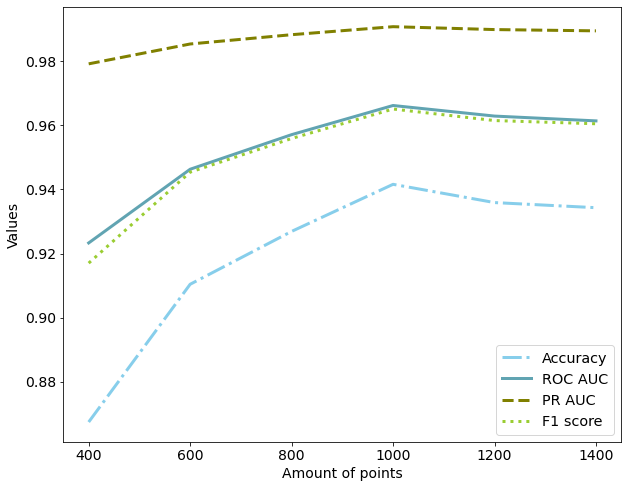

In [261]:
# Data
df = pd.DataFrame({'x_values': [400, 600, 800, 1000, 1200, 1400], 'y1_values': [0.8674, 0.9104, 0.9269, 0.9416, 0.9359, 0.9343], 'y2_values': [0.9233, 0.9463, 0.9571, 0.9662, 0.9629, 0.9614], 'y3_values': [0.9792, 0.9854, 0.9883, 0.9908, 0.9899, 0.9895], 'y4_values': [0.9170, 0.9454, 0.9559, 0.9651, 0.9615, 0.9605] })
plt.rcParams["figure.figsize"] = (10, 8)
# multiple line plots
plt.plot( 'x_values', 'y1_values', data=df, marker='', color='skyblue', linewidth=3, linestyle='-.', label="Accuracy")
plt.plot( 'x_values', 'y2_values', data=df, marker='', color='#61a4b2', linewidth=3, label="ROC AUC")
plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=3, linestyle='dashed', label="PR AUC")
plt.plot( 'x_values', 'y4_values', data=df, marker='', color='yellowgreen', linewidth=3, linestyle='dotted', label="F1 score")

plt.xticks([400, 600, 800, 1000, 1200, 1400], [400, 600, 800, 1000, 1200, 1400], fontsize=14)
plt.yticks(fontsize=14)
# show legend
plt.legend(loc="lower right", fontsize="x-large")
plt.xlabel("Amount of points", fontsize=14)
plt.ylabel("Values", fontsize=14)

# show graph
plt.show()